## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Walkthrough

In [1]:
import os
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'..'))
import ExMAS
import ExMAS_utils

In [3]:
from ExMAS_utils import inData as inData

### prepare

1. __load the default config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS_utils.get_config('data/configs/default.json') # load the default 

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [5]:
inData = ExMAS_utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [6]:
inData = ExMAS_utils.generate_demand(inData, params)

### run

03-07-20 13:08:21-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
03-07-20 13:08:21-INFO-creating combinations
03-07-20 13:08:21-INFO-39800	 nR*(nR-1)
03-07-20 13:08:21-INFO-10394	departure compatibility
03-07-20 13:08:22-INFO-5198	origins shareability
03-07-20 13:08:22-INFO-1178	utility for i
03-07-20 13:08:22-INFO-317	utility for j
03-07-20 13:08:22-INFO-210	LIFO pairs
03-07-20 13:08:22-INFO-Reduction of feasible pairs by 99.47%


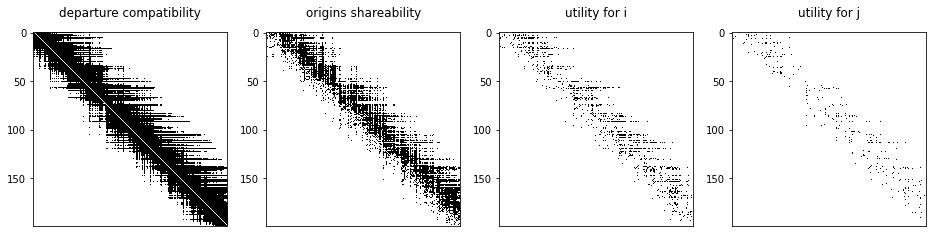

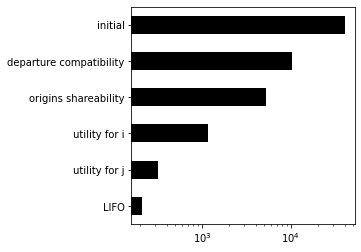

03-07-20 13:08:23-INFO-Degree 2 	Completed
03-07-20 13:08:23-INFO-trips to extend at degree 2 : 527
03-07-20 13:08:23-INFO-At degree 2 feasible extensions found out of 35 searched
03-07-20 13:08:23-INFO-Degree 3 	Completed
03-07-20 13:08:23-INFO-trips to extend at degree 3 : 35
03-07-20 13:08:23-INFO-At degree 3 feasible extensions found out of 0 searched
03-07-20 13:08:23-INFO-Degree 4 	Completed
03-07-20 13:08:23-INFO-No more trips to exted at degree 4
03-07-20 13:08:24-INFO-Matching 200 trips to 762 rides in order to minimize u_veh


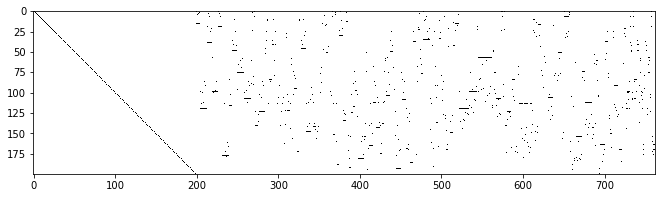

03-07-20 13:08:24-INFO-Problem solution: Optimal. 
Total costs for single trips:         63,913 
reduced by matching to:               54,493
03-07-20 13:08:24-INFO-Calculations  completed
03-07-20 13:08:25-INFO-DotMap(VehHourTrav=53848, VehHourTrav_ns=63913, PassHourTrav=70152, PassHourTrav_ns=63913, PassUtility=942.3078499999999, PassUtility_ns=991.682, mean_lambda=0.2270153030485601, revenue_s=67108.65, revenue_ns=95869.5, Fare_Discount=-0.30000000000000004, nR=200, SINGLE=96, PAIRS=43, TRIPLES=6, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.52, fleet_size_nonshared=23.0, fleet_size_shared=19.0, lambda_shared=0.2270153030485601)


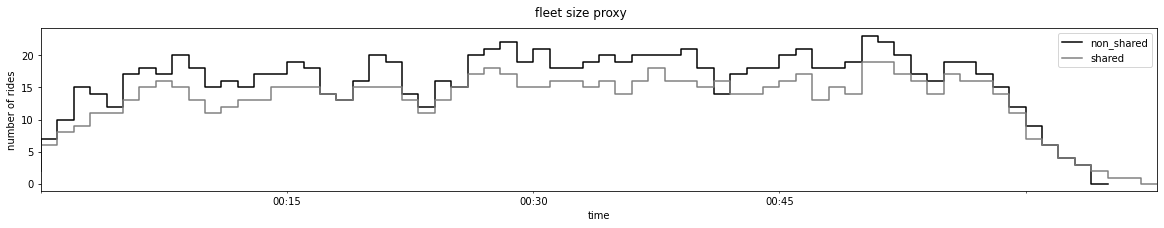

In [7]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [8]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS_utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

,KPI,description
VehHourTrav,53848,total travel time of vehicles (with travellers...
VehHourTrav_ns,63913,as above yet in non-shared scenarion
PassHourTrav,70152,total travel time of passengers
PassHourTrav_ns,63913,as above yet in non-shared scenarion
PassUtility,942.308,total (dis)utility of passengers
PassUtility_ns,991.682,as above yet in non-shared scenarion
mean_lambda,0.227015,mean vehicle cost reduction (lambda) over shar...
revenue_s,67108.6,total fares paid by travellers sharing
revenue_ns,95869.5,as above yet in non-shared scenarion
Fare_Discount,-0.3,relative revenue reduction


 all feasible rides

In [9]:
inData.sblts.rides.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
605,"[114, 161]",15.83890,1152,21,"[11.947775, 3.891125]","[2097.5, 797, 288, 52]","[114, 161]","[161, 114]",2.0,605,-0.079663,1067,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
369,"[130, 151]",8.26700,643,20,"[5.732474999999999, 2.534525]","[2341.5, 429, 15, 184]","[130, 151]","[130, 151]",2.0,369,-0.068106,602,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
400,"[141, 181]",11.62315,851,20,"[7.073675, 4.549474999999999]","[2659.5, 497, 55, 284]","[141, 181]","[141, 181]",2.0,400,-0.040342,818,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
0,[0],1.58100,102,1,[1.581],"[0, 102]",[0],[0],1.0,0,0.300000,102,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
24,[24],7.99150,515,1,[7.9915],"[432, 515]",[24],[24],1.0,24,0.300000,515,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


selected rides in the solution

In [10]:
inData.sblts.schedule.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
159,[159],1.3730,88,1,[1.373],"[2843, 88]",[159],[159],1,159,0.3,88,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
82,[82],0.6445,41,1,[0.6445000000000001],"[1614, 41]",[82],[82],1,82,0.3,41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
44,[44],5.2730,340,1,[5.273],"[826, 340]",[44],[44],1,44,0.3,340,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
54,[54],4.4375,286,1,[4.4375],"[1036, 286]",[54],[54],1,54,0.3,286,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
153,[153],6.4230,414,1,[6.423],"[2757, 414]",[153],[153],1,153,0.3,414,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


trips with parameters of the shared ride

In [11]:
inData.sblts.requests.sample(5)

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
187,62,1402734949,4261101335,3316,NaN,326,2020-07-03 16:09:00,NaN,2610,62,0.0035,182.901099,5.0560,999999,187,326,5.0560,1,0
182,23,1620137089,1448391082,3213,NaN,237,2020-07-03 15:55:28,NaN,1901,23,0.0035,133.318681,3.6810,999999,182,237,3.6810,1,0
172,49,44827063,44838791,3099,NaN,129,2020-07-03 15:39:09,NaN,1036,49,0.0035,72.692308,2.0055,999999,172,129,2.0055,1,0
146,29,1668136752,44750625,2641,NaN,305,2020-07-03 15:54:55,NaN,2440,29,0.0035,170.934066,4.7275,999999,146,305,4.7275,1,0
139,60,894421661,44825826,2533,NaN,152,2020-07-03 15:32:44,NaN,1217,60,0.0035,85.285714,2.3575,999999,139,152,2.3575,1,0


---
(c) Rafał Kucharski, Delft, 2020